<a href="https://colab.research.google.com/github/AndrewCrossman/PHYS824/blob/main/Phys824_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conductance and Shot Noise of Pseudodiffusive and Diffusive Electron Transport Through Graphene Nanoribbons
### © Andrew Crossman, University of Delaware
[PHYS824: Nanophysics & Nanotechnology](https://wiki.physics.udel.edu/phys824) 

In [1]:
pip install kwant

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 4.9 MB/s 
  Created wheel for kwant: filename=kwant-1.4.3-cp38-cp38-linux_x86_64.whl size=4293435 sha256=71bb861f3e8268b8920bfedd81553529687f50ee34ba11cd3d6256d48dbc818c
  Stored in directory: /root/.cache/pip/wheels/6f/df/9e/c539998ebc40515fff5ab4a3254a8defafa218f89848e47de8
  Created wheel for tinyarray: filename=tinyarray-1.2.4-cp38-cp38-linux_x86_64.whl size=231203 sha256=9fc6af0e8557d71cae9125dcd580f0ea0ebae654b9b4ece4d78eac01ad76dd6c
  Stored in directory: /root/.cache/pip/wheels/60/fc/af/bd51765e167af783d7211176ba6da429472161b2462d4d5bc6
Successfully built kwant tinyarray


In [2]:
# Imports
import numpy as np
import kwant 
from kwant.builder import HoppingKind 
from numpy.random import rand
from functools import reduce
import scipy.linalg as la
import math
from math import sqrt
from numpy import arange
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.8/dist-packages/kwant/solvers/default.py:16: RuntimeWarning: MUMPS is not available, SciPy built-in solver will be used as a fallback. Performance can be very poor in this case.
  warnings.warn("MUMPS is not available, "


In [3]:
# If using Google Colab Include
from google.colab import files

## Part I: Semi-infinite ZGNR with Leads

In [20]:
graphene = kwant.lattice.general([[1, 0], [1/2, np.sqrt(3)/2]],  # lattice vectors
                                 [[0, 0], [0, 1/np.sqrt(3)]])  # Coordinates of the sites
a, b = graphene.sublattices
gr_lat = kwant.lattice.honeycomb(a=2.46)
v1, v2 = gr_lat.prim_vecs 
t = -3
gate = 0.5
energy = 0.505

In [32]:
def ribbon_sys(pos):
    x, y = pos
    width = 30
    length = 10
    return abs(x) < 0.5*length and abs(y) < 0.5*width

def ribbon_lead(pos):
    x, y = pos
    width = 30
    return abs(y) < 0.5*width 

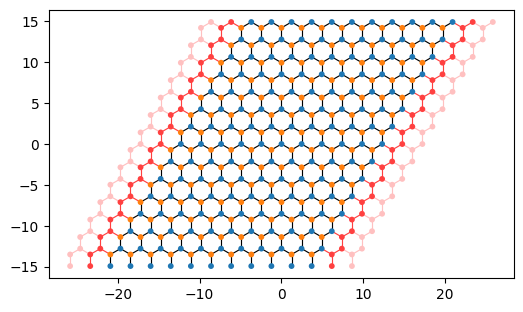

In [33]:
# Make graphene ribbon
sys = kwant.Builder()
sys[gr_lat.shape(ribbon_sys, (0, 0))] = gate
sys[gr_lat.neighbors(1)] = t
# Make leads
left_direction = kwant.TranslationalSymmetry(-v1)
left_lead = kwant.Builder(left_direction)
left_lead[gr_lat.shape(ribbon_lead, (0, 0))] = 0
left_lead[gr_lat.neighbors()] = t
# Attach leads
sys.attach_lead(left_lead)
sys.attach_lead(left_lead.reversed())
kwant.plot(sys, dpi=100);
# Finalize systems
sys = sys.finalized()
left_lead = left_lead.finalized()

Calculate the Conductance (σ) and the Fanofactor for the ZGNR

In [31]:
smatrix = kwant.smatrix(sys, energy)
np.random.seed(2) 
tmat = smatrix.submatrix(1, 0) # transmission from lead 0->1
tt = np.dot(tmat, tmat.conj())
evals = np.linalg.eigvals(tt)
num = 0
den = 0
for x in evals:
  den = den + x
  num = num + x*(1-x)
conductance = den.real # from lead 0->1
fano = (num/den).real
print(conductance, fano)

0.4462381657169239 0.7767972368494136


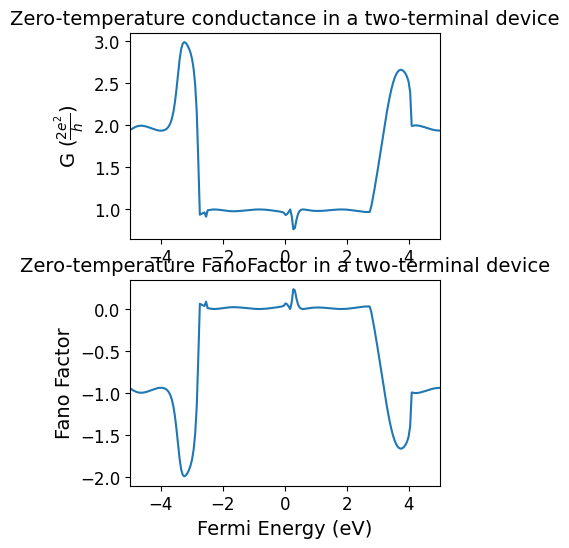

In [15]:
plt.figure(dpi=100,figsize=(4,6))
plt.subplot(211)
axes = plt.gca()
axes.set_title('Zero-temperature conductance in a two-terminal device', fontsize=14)
axes.set_xlabel('', fontsize=14)
axes.set_ylabel(r'G ($\frac{2e^2}{h}$)', fontsize=14)
axes.set_xlim(-5,5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(energies, t10, color='C0');

plt.subplot(212)
axes = plt.gca()
axes.set_title('Zero-temperature FanoFactor in a two-terminal device', fontsize=14)
axes.set_xlabel('Fermi Energy (eV)', fontsize=14)
axes.set_ylabel(r'Fano Factor', fontsize=14)
axes.set_xlim(-5,5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(energies, fano,color='C0')